In [1]:
import glob
import os
import mne
import numpy as np
import matplotlib.pyplot as plt
data_dir = 'data_meg'
subj = "R2210"
dtype = "raw"
save_dir = '/Users/dorisyu/meg_decoding/data_processed'

In [2]:
raws = []
for file in glob.glob(f'{data_dir}/{subj}/*{dtype}*.fif'):
    print(file)
    raws.append(mne.io.read_raw_fif(file, preload=True))
if raws != []:  
    raw = mne.concatenate_raws(raws)




data_meg/R2210/R2210_Abstract_Block1_102924-raw.fif
Opening raw data file data_meg/R2210/R2210_Abstract_Block1_102924-raw.fif...
    Range : 0 ... 1394999 =      0.000 ...  1394.999 secs
Ready.
Reading 0 ... 1394999  =      0.000 ...  1394.999 secs...
data_meg/R2210/R2210_Abstract_Block2_102924-raw.fif
Opening raw data file data_meg/R2210/R2210_Abstract_Block2_102924-raw.fif...
    Range : 0 ... 939999 =      0.000 ...   939.999 secs
Ready.
Reading 0 ... 939999  =      0.000 ...   939.999 secs...
data_meg/R2210/R2210_Abstract_Block3_102924-raw.fif
Opening raw data file data_meg/R2210/R2210_Abstract_Block3_102924-raw.fif...
    Range : 0 ... 619999 =      0.000 ...   619.999 secs
Ready.
Reading 0 ... 619999  =      0.000 ...   619.999 secs...


In [3]:
raw.filter(1, 40, method='iir')

Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB



<Raw | R2210_Abstract_Block1_102924-raw.fif, 193 x 2955000 (2955.0 s), ~4.25 GB, data loaded>

In [4]:
events = mne.find_events(raw, stim_channel='STI 014', output='onset', shortest_event=1)
event_id = {
    'start': 1,
    'move': 2,
    'reveal_red': 4,
    'reveal_white': 8,
    'done': 16,
}
epochs = mne.Epochs(raw, events, event_id, tmin=-0.2, tmax=1.0, baseline=(None, 0), preload=True)

print(epochs)


5438 events found on stim channel STI 014
Event IDs: [ 1  2  4  8 16]


Not setting metadata
5438 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 5438 events and 1201 original time points ...
0 bad epochs dropped
<Epochs | 5438 events (all good), -0.2 – 1 s (baseline -0.2 – 0 s), ~9.39 GB, data loaded,
 'start': 120
 'move': 4191
 'reveal_red': 617
 'reveal_white': 390
 'done': 120>


Using matplotlib as 2D backend.


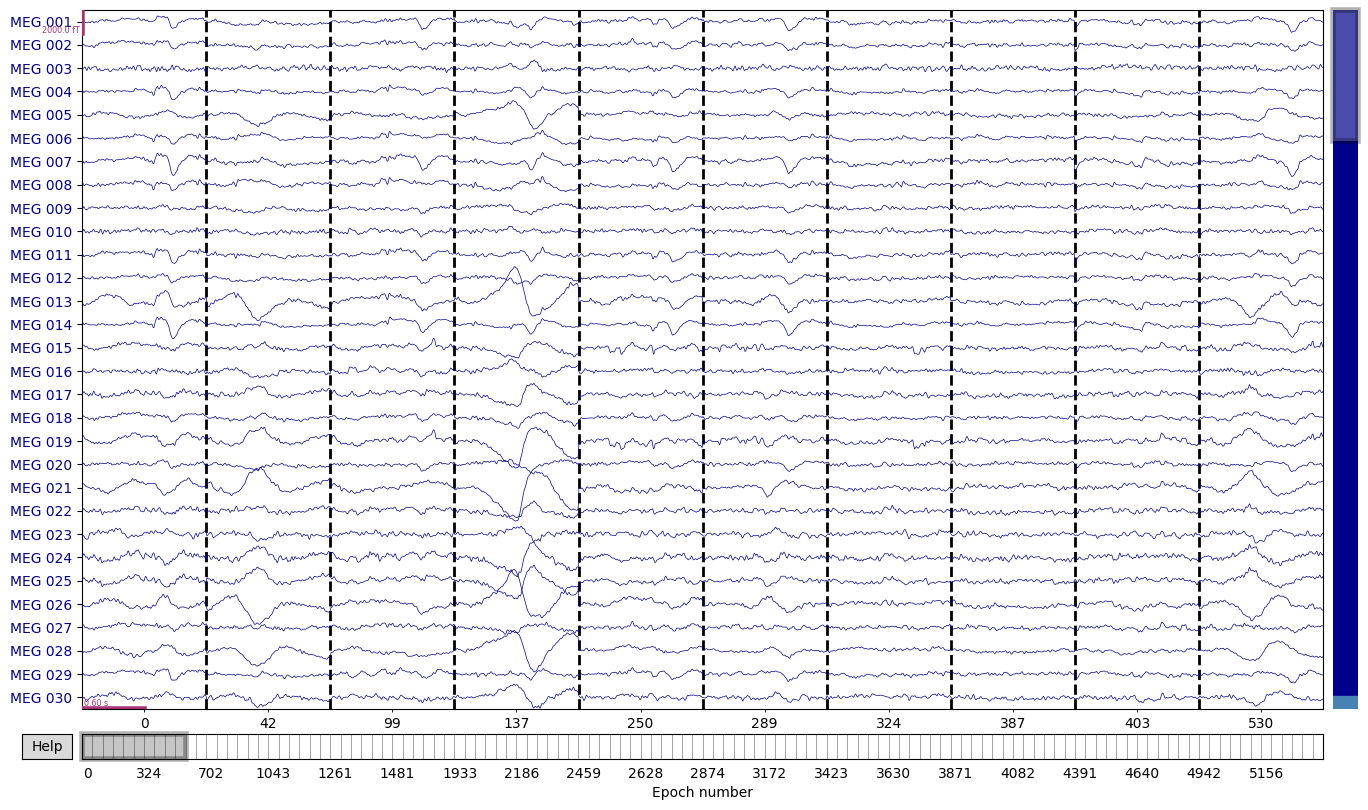

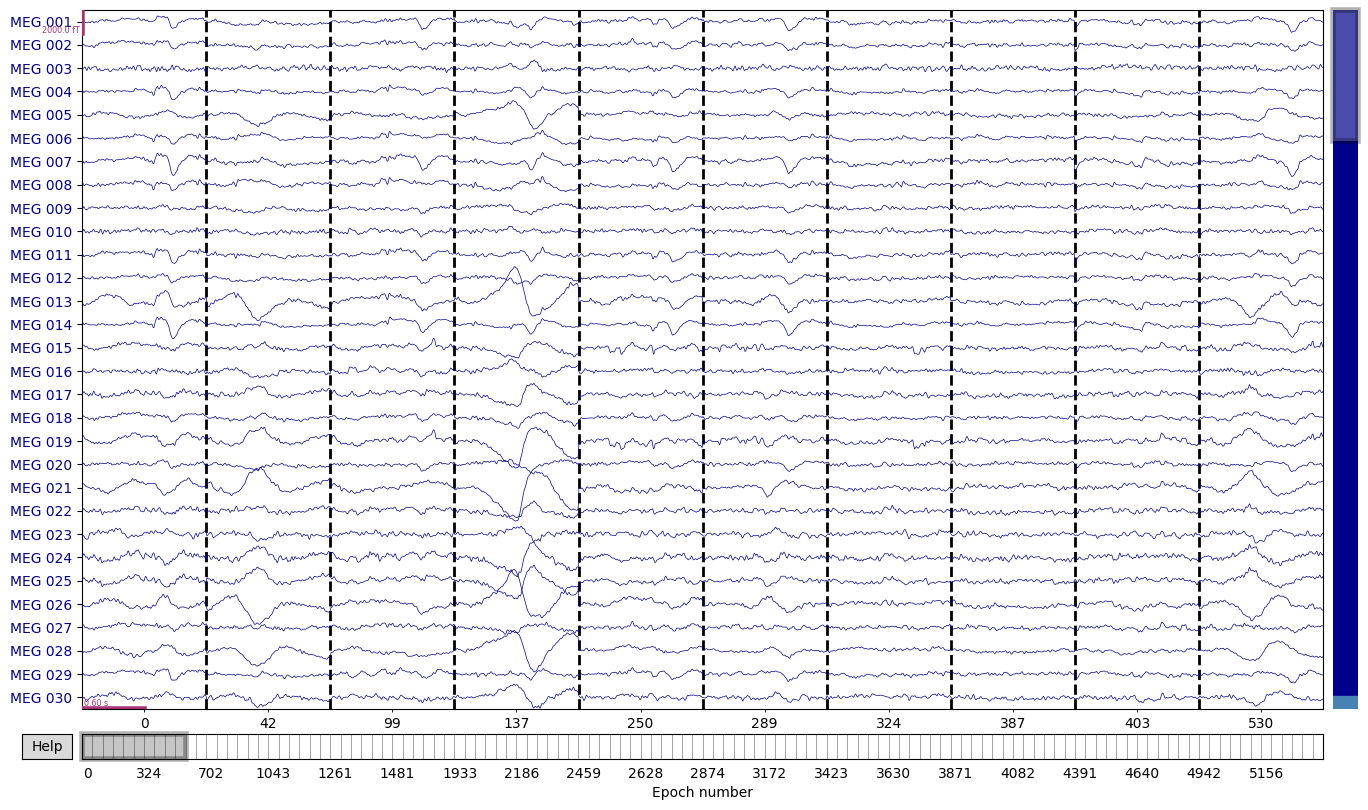

In [5]:
# Get the data array (n_epochs x n_channels x n_times)
data = epochs.get_data()

# Access epochs for a specific event type
stimulus_start_epochs = epochs['start']
stimulus_start_epochs.plot(n_epochs=10, n_channels=30)


In [6]:
epochs.save(f'{save_dir}/{subj}_epochs.fif', overwrite=True)


/var/folders/79/m99pb_8d67l3d79st4zhf4tc0000gn/T/ipykernel_19506/2511566023.py:1: RuntimeWarning: This filename (/Users/dorisyu/meg_decoding/data_processed/R2210_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs.save(f'{save_dir}/{subj}_epochs.fif', overwrite=True)


Splitting into 3 parts


: 

In [ ]:
ica = mne.preprocessing.ICA(n_components=0.95, method='fastica')
print('fitting ica...')
ica.fit(raw, reject={'mag': 5e-12})
ica.plot_sources(raw)
input('press enter to see topos...')
ica.plot_components()

In [ ]:
print('excluding:', ica.exclude)
raw = ica.apply(raw, exclude=ica.exclude)